In [1]:
import sys
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from rtbm import RTBM
import minimizer

from costfunctions import logarithmic

import warnings
warnings.filterwarnings('ignore')

%load_ext autoreload

In [2]:
%autoreload

# Example 1

## Generate data

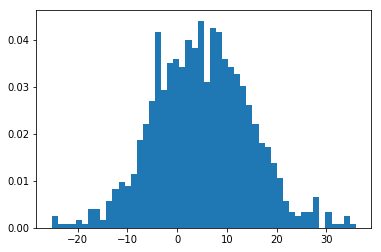

In [3]:
# simple gaussian
n = 1000
data = (np.random.normal(5,10,n)).reshape(1,n)
plt.hist(data.T, bins=50, normed=True);

## Training

In [4]:
a = RTBM(1,1)

In [5]:
minim = minimizer.CMA(False)

CMA on 1 cpu(s) enabled


In [ ]:
solution = minim.train(logarithmic, a, data, tolfun=1e-4)

(4_w,8)-aCMA-ES (mu_w=2.6,w_1=52%) in dimension 5 (seed=416114, Wed Oct 18 14:21:33 2017)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      8 5.148611608282265e+03 1.0e+00 9.17e-01  8e-01  1e+00 0:00.3
    2     16 1.948085079896793e+04 1.3e+00 9.26e-01  8e-01  1e+00 0:00.5
    3     24 7.133281175530811e+03 1.4e+00 8.28e-01  6e-01  9e-01 0:00.7
   19    152 5.380057873384756e+03 3.0e+00 6.16e-01  3e-01  8e-01 0:03.8
   40    320 4.256069001505899e+03 5.1e+00 2.56e-01  6e-02  3e-01 0:08.0
   68    544 3.939655757673926e+03 4.1e+01 3.55e-01  4e-02  4e-01 0:13.0
   94    752 3.703376285620449e+03 2.2e+02 1.77e-01  2e-02  3e-01 0:19.1
  100    800 3.697224498563886e+03 2.5e+02 1.12e-01  1e-02  2e-01 0:20.6
  133   1064 3.686605731085030e+03 1.4e+03 1.27e-01  5e-03  3e-01 0:28.7


## Testing output

In [ ]:
test_data = (np.linspace(-40,40, 100)).reshape(1, 100)
plt.hist(data.T, bins=50, normed=True)
plt.plot(test_data.flatten(), a(test_data).flatten(), 'o-')

# Example 2

## Generate data

In [ ]:
def gaussian_mixture(n):
    v = np.zeros(n)
    u = np.random.random_sample(n)
    for i in range(n):
        if u[i] < 0.6:
            v[i] = np.random.normal(-5, 3)
        elif u[i] < 0.7:
            v[i] = np.random.normal(2, 1)
        else:
            v[i] = np.random.normal(5, 5)
    return v

n = 1000
data = (gaussian_mixture(n)).reshape(1,n)
plt.hist(data.T, normed=True, bins=50);

## Training

In [ ]:
a = RTBM(1,2)

In [ ]:
minim = minimizer.CMA(True)

In [ ]:
solution = minim.train(logarithmic, a, data, tolfun=1e-5)

## Testing output

In [ ]:
test_data = (np.linspace(-50,50, 100)).reshape(1, 100)
plt.hist(data.T, bins=50, normed=True);
plt.plot(test_data.flatten(), a(test_data).flatten(), 'o-')